<a href="https://colab.research.google.com/github/JulioHaro93/PracticasTesisKeras/blob/main/CNN_Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install tensorflow==2.12

Primer paso librerías

Esta va para la tesis

In [69]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.12.0'

# preprocesador de datos de imágenes

In [70]:
#configuramos el nombre de las clases del dataset

class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

# Cargar el dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

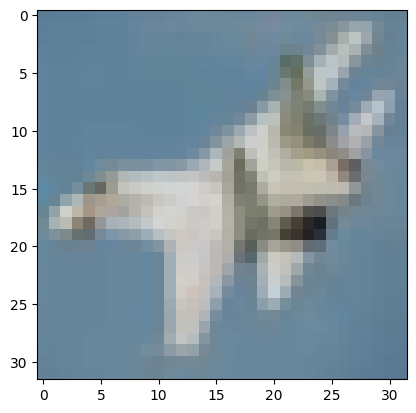

In [71]:
plt.imshow(X_test[10])

In [72]:
#normalizamos datos
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train.shape
X_test.shape

(10000, 32, 32, 3)

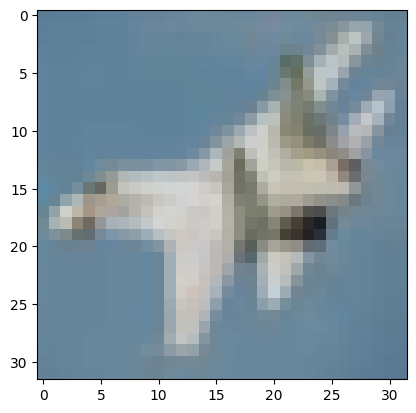

In [73]:
#para ver una muestra de los datos:
plt.imshow(X_test[10])

# Creación del modelo de CNN


In [74]:
#lo construímos con sequential porque nos permite construir la secuencia de capas

model = tf.keras.models.Sequential()

Primer capa convolucional
hiperparámetros:

filtros: 32

tamaño del kernel: 3

padding: same

función de activación: relu

input_shape(32,32,3)

In [75]:
#Considerar la importancia del padding same, ya que completa el resultado de la convolución para que quede cuadrada
#para evitar que se pierda información

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

# añadimos una segunda capa de convolución y la capa de max-pooling

Hiperparámetros de una segunda capa

*   Filtros: 32
*   kernel: 3
*   padding:. same
*   activación: relu

Capa max-pooling (MaxPool):

*   pool_size: 2
*   strides: 2
*   padding:. valid






In [76]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
#Recuerda que define una ventana de 2 x 2, en un padding válido para resaltar las características
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## PArece ser que mientras más capas de convolución y de maxpooling da muy buenos resultados en imágenes, sin embargo aquí lega al 60 de accuracy

Hiperparámetros de una tercera capa

*   Filtros: 64
*   kernel: 3
*   padding:. same
*   activación: relu

Capa max-pooling (MaxPool):

*   pool_size: 2
*   strides: 2
*   padding:. valid

Hiperparámetros de una cuarta capa

*   Filtros: 64
*   kernel: 3
*   padding:. same
*   activación: relu

Capa max-pooling (MaxPool):

*   pool_size: 2
*   strides: 2
*   padding:. valid

In [77]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [78]:
#Agregamos el aplanado final flattening
#Construye una capa de datos aplanados en un sólo vector
model.add(tf.keras.layers.Flatten())

#Agregamos la primer capa completamente conectada

Hiperparámetros:
* neuronas: 128
* función de activación: relu

In [79]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#agregamos la capa de salida, ésta red sólo tiene 6 capas con función de activación

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#Ahora compilamos el modelo

Recordemos que el adam es el optimizador, y que se utiliza el sparse_categorical para la entropía cruzada y para el accuracy, esto debido a que es multiclase

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

#Pasamos al entrenamiento

In [67]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/5
1563/1563 [==============================] - 277s 176ms/step - loss: 1.3889 - sparse_categorical_accuracy: 0.4967
Epoch 2/5
1563/1563 [==============================] - 278s 178ms/step - loss: 0.9195 - sparse_categorical_accuracy: 0.6782
Epoch 3/5
1563/1563 [==============================] - 271s 173ms/step - loss: 0.7363 - sparse_categorical_accuracy: 0.7440
Epoch 4/5
1563/1563 [==============================] - 269s 172ms/step - loss: 0.6101 - sparse_categorical_accuracy: 0.7884
Epoch 5/5
1563/1563 [==============================] - 275s 176ms/step - loss: 0.5066 - sparse_categorical_accuracy: 0.8208


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))
print("Test loss: {}".format(test_loss))